<a href="https://colab.research.google.com/github/akumarpandey686/brain_tumor_classification/blob/master/Brain_Tumor_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# Re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/MTech/final_dataset/train'
valid_path = '/content/drive/My Drive/MTech/final_dataset/test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# We are using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [5]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/MTech/final_dataset/train/*')

In [8]:
folders

['/content/drive/My Drive/MTech/final_dataset/train/tumor',
 '/content/drive/My Drive/MTech/final_dataset/train/non_tumor']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/MTech/final_dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 188 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/MTech/final_dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 75 images belonging to 2 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
6/6 [==============================] - 141s 24s/step - loss: 2.3985 - accuracy: 0.4681 - val_loss: 0.5161 - val_accuracy: 0.7867
Epoch 2/50
6/6 [==============================] - 2s 401ms/step - loss: 0.7607 - accuracy: 0.6223 - val_loss: 0.5750 - val_accuracy: 0.6400
Epoch 3/50
6/6 [==============================] - 2s 408ms/step - loss: 0.6271 - accuracy: 0.6755 - val_loss: 0.5896 - val_accuracy: 0.7067
Epoch 4/50
6/6 [==============================] - 2s 410ms/step - loss: 0.6137 - accuracy: 0.6968 - val_loss: 0.5219 - val_accuracy: 0.8533
Epoch 5/50
6/6 [==============================] - 2s 416ms/step - loss: 0.5913 - accuracy: 0.7128 - val_loss: 0.4873 - val_accuracy: 0.8800
Epoch 6/50
6/6 [==============================] - 2s 406ms/step - loss: 0.5872 - accuracy: 0.7128 - val_loss: 0.4555 - val_accuracy: 0.8400
Epoch 7/50
6/6 [==============================] - 2s 414ms/step - loss: 0.5680 - acc

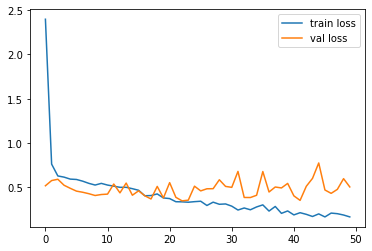

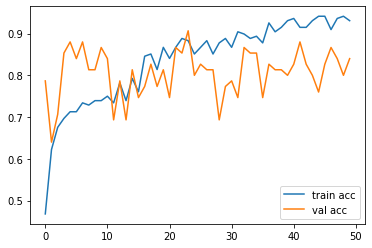

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# saving it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [23]:
# #downloading the model
from google.colab import files
files.download("model_vgg19.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
y_pred = model.predict(test_set)

In [25]:
y_pred

array([[9.86191869e-01, 1.38081759e-02],
       [9.44377303e-01, 5.56227192e-02],
       [2.82449275e-01, 7.17550695e-01],
       [9.65195537e-01, 3.48044597e-02],
       [9.84591007e-01, 1.54089611e-02],
       [7.05222553e-03, 9.92947698e-01],
       [1.97444670e-03, 9.98025537e-01],
       [7.42048398e-03, 9.92579520e-01],
       [9.97237563e-01, 2.76247063e-03],
       [3.37144639e-03, 9.96628582e-01],
       [5.12578571e-03, 9.94874179e-01],
       [1.86342329e-01, 8.13657701e-01],
       [9.66863155e-01, 3.31369080e-02],
       [4.78370607e-01, 5.21629393e-01],
       [1.49024220e-03, 9.98509705e-01],
       [4.36798722e-01, 5.63201249e-01],
       [9.60340381e-01, 3.96595411e-02],
       [5.62456787e-01, 4.37543154e-01],
       [9.99925494e-01, 7.45395228e-05],
       [9.99302983e-01, 6.96961477e-04],
       [3.43738175e-05, 9.99965668e-01],
       [3.75316739e-01, 6.24683261e-01],
       [4.08234634e-02, 9.59176540e-01],
       [9.99068916e-01, 9.31079965e-04],
       [3.753448

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1])

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('model_vgg19.h5')

In [38]:
img=image.load_img('/content/drive/My Drive/MTech/final_dataset/for_testing/non_tumor/3 no.jpg',target_size=(224,224))

In [39]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(x)

array([[1., 0.]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
print(a)

[1]


In [46]:
if(a==1):
    print("Non_tumor")
else:
    print("Tumor")

Non_tumor
